In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# The High Level intuition into Lane Line detection!

# The Algorithm:

- find edges in the diagram using canny edge detection algorithm
- identify the region of interest
- Apply Hoguh Transform
- optimize detected lines form hough Transform
- create a mask and draw otimized lines on the mask
- overlap the mask with lane image using cv2 addweighted function

In [2]:
def canny_edge(img):
    """
    This function takes an image, return edges detected in it
    it can work for both gray and colored images.
    """
    if len(img.shape) > 2:
        assert len(img.shape) == 3, "expected a 3d array at most"
        #copy image
        copy_img = img.copy()
        #convert to gray scale
        gray_img = cv2.cvtColor(copy_img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img.copy()
    
    #gaussian blur
    blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    
    #canny edge detection
    canny_img = cv2.Canny(blur_img, 50, 150)
    
    return canny_img


def region_of_interest(img):
    """
    This function returns an enclosed region 
    of our field of view.
    
    arguments:
    img -> a canny edge detected image.
    """
    
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, polygons, 255) #255 will be the color of the polygon
    
    #bitwise and
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img


def make_coordinates(img, line_parameters):
    slope, intercept = line_parameters
    y1 = img.shape[0]
    # we want the height of the new line to be 3/5 of the y-axis
    y2 = int(y1 * (3/5))
    # re-arranging y= mx + b we can get the x-coordinate values
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    #the maths above allows both of our lines to have 
    #the same vertical coordinates
    return np.array([x1, y1, x2, y2])

def average_slope_intercept(img, lines):
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 =line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(img, left_fit_average)
    right_line = make_coordinates(img, right_fit_average)
    
    return np.array([left_line, right_line])


def display_lines(img, lines):
    line_img = np.zeros_like(img)
    #lines will be a 3d array
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line
            #let's draw the line one our line_img mask
            #with BGR color of blue and line thickness of 10
            cv2.line(line_img, (x1,y1), (x2, y2), (255, 0, 0), 10)
    return line_img

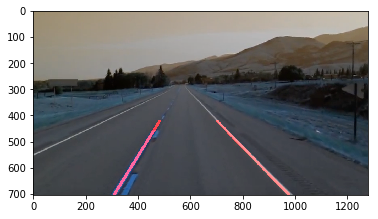

In [3]:
# import image
image = cv2.imread('image/test_image.jpg')

# create a copy to work with
lane_image = np.copy(image)

#find edges in the image
canny_image = canny_edge(lane_image)

#identify your region of interest
roi_image = region_of_interest(canny_image)

#aply hough transform
detected_lines = cv2.HoughLinesP(roi_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

#optimize the detected lines
averaged_lines = average_slope_intercept(lane_image, detected_lines)

#draw the lines on the a mask image same shape as lane_image
line_image = display_lines(lane_image, averaged_lines)

#overlap the optimized lane line mask with the Image.
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)


plt.imshow(combo_image)

# A break down/ deep dive into how all parts of the code works.

In [4]:
image = cv2.imread('image/test_image.jpg')

In [5]:
#cv2.imshow('result', image)
#cv2.waitKey(0)

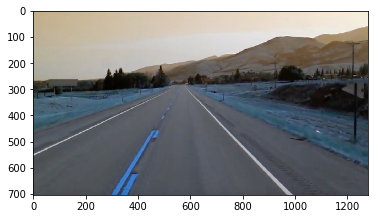

In [6]:
#image = plt.imread('image/test_image.jpg')
plt.imshow(image)

The goal of edge detection is to identify sharp changes in pixel intensity of adgjacent pixels in an image.

In [7]:
lane_image = np.copy(image)

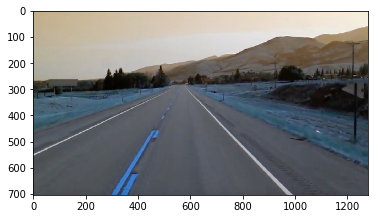

In [8]:
plt.imshow(lane_image)

## Step 1 - Convert to gray scale

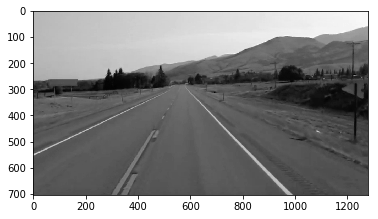

In [9]:
#cvtColor converts images from one color space to another
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

In [10]:
lane_image.shape

(704, 1279, 3)

In [11]:
gray.shape

(704, 1279)

## step 2 - apply a gaussian blur

this helps us to eliminate image noise. image noise can create false edges and ultimately affect edge detection.

we achieve this filtering we will use a gaussian filter.

the arguments of the gaussian blur are:

- the image to be blurred

- the kernel, which is a two sized tuple e.g (3, 3), (5, 5)

- Deviation (we set as zero)

In [12]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

Text(0.5,1,'smoothened Image')

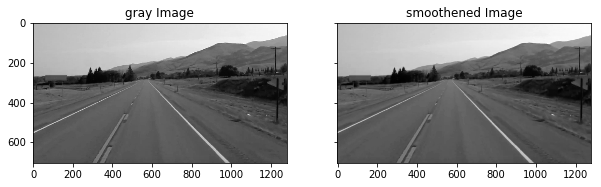

In [13]:
#plt.figure(figsize=(8, 10))
fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(10, 12)
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('gray Image')
ax[1].imshow(blur, cmap='gray')
ax[1].set_title('smoothened Image')

## step 3 canny edge detection

kindly note that canny edge detection automatically applies a gaussian blur filter to an image.

the function has the ffg arguments

1. the image to be transformed

2. low_threshold: pixel intensity changes below this threshold are rejected

3. high_threshold: gradients larger than this treshold is accpted as an edge pixel

gradients between the lower and upper threshold are accepted only if they are connected to a strong edge.

the documnetation recommends a threshold of 1:2 or 1:3

In [14]:
canny = cv2.Canny(blur, 50, 150)

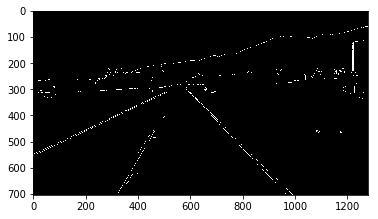

In [15]:
plt.imshow(canny, cmap='gray')

# summarize code in a function and test

In [16]:
tup1 = (1, 2, 3)
tup2 = (4, 5)

In [17]:
len(tup1)

3

In [18]:
def canny_edge(img):
    """
    This function takes an image, return edges detected in it
    it can work for both gray and colored images.
    """
    if len(img.shape) > 2:
        assert len(img.shape) == 3, "expected a 3d array at most"
        #copy image
        copy_img = img.copy()
        #convert to gray scale
        gray_img = cv2.cvtColor(copy_img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img.copy()
    
    #gaussian blur
    blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    
    #canny edge detection
    canny_img = cv2.Canny(blur_img, 50, 150)
    
    return canny_img

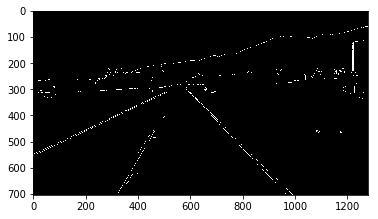

In [19]:
w_col = canny_edge(lane_image)

plt.imshow(w_col, cmap='gray')

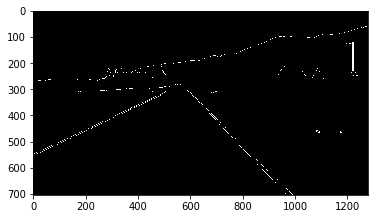

In [20]:
wo_color = canny_edge(blur)
plt.imshow(wo_color, cmap='gray')

can you notice how the image is different?? what's wrong?? let's see..

In [21]:
def canny(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    canny_img = cv2.Canny(blur_img, 50, 150)
    return canny_img

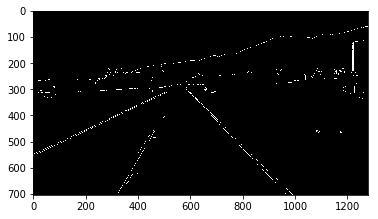

In [22]:
ins_img = canny(lane_image)
plt.imshow(ins_img, cmap='gray')

Figured!! we applied gaussian blur to an already blurred image. we were supposed to pass a gray image not a blured one

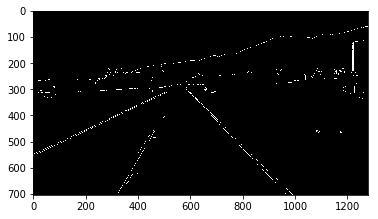

In [23]:
wo_blur = canny_edge(gray)
plt.imshow(wo_blur, cmap='gray')

# finding the region of Interest

to find our region of interest we have to use a polygon to capture a triangle like shape, make a mask with it's dimensions and then apply it as a line on our image.

for our particular image, the following (x, y) dimensions work...

(200, 700), (1100, 700), (550, 300). this are x,y coordinates. hopefully, you're not confused.

In [24]:
def region_of_interest(img):
    """
    This function returns an enclosed region 
    of our field of view.
    
    arguments:
    img -> a canny edge detected image.
    """
    
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, polygons, 255) #255 will be the color of the polygon
    
    return mask

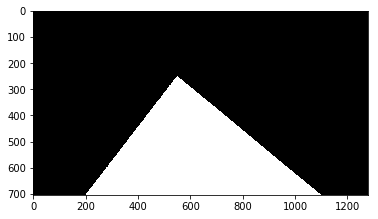

In [25]:
canny = canny_edge(lane_image)
plt.imshow(region_of_interest(canny), cmap='gray')

bit wise and operation allows us to place the mask image on our canny image and get it to show only our edges. this is possible becuase of how the bit wise an operation works. to sumarize the intuition:

except a white region in one image overlaps a white reion in the second image, the region is represented as a black region in the overlaped images output.

since  we have marked out our region of intrest to be white and every other region in our mask as black, when we overlap with the canny images, it finds corresponding white lines in the region of intrest and highlights it, every other region gets represented as black.

when we Implement it, you'd understand better.

In [26]:
def region_of_interest(img):
    """
    This function returns an enclosed region 
    of our field of view.
    
    arguments:
    img -> a canny edge detected image.
    """
    
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, polygons, 255) #255 will be the color of the polygon
    
    #bitwise and
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

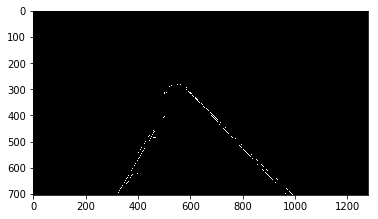

In [27]:
roi_img = region_of_interest(canny)
plt.imshow(roi_img, cmap='gray')

## Detecting Straight lines in our region of interest - Hough Transform

the hough line has been implented in cv2 as HoughLinesP and has the ffg paramters.

- roi_img/cropped image. -> the overlapped image from region of interest

- second and 3rd arguments specify the resolution of the hough accumulator array. 
    - rho
    - theta

- threshold -> optimal number of votes we can use to qualify a line i.e minimal number of intersections needed to detect a line.

- place holder array (an empty array)

- length of line in pixels which we will accept into the output. detected lines with length less than this argument value are rejected.

- maxLineGap -> indicates the maximum distance in pixels btwn segmented lines which we will allow to be connected intoa  single line instead of them being broken up.



this accumulator is a 2d array of rows and columns whichw e will use to collect votes. these 2 args are very important as they speciffy the size of the voting bins. rho is the distant resolution of the accumulator (height/no of rows) in pixels and theta is the angle resolution of the accumulator in radians.

**the larger the bins, the less precision with which lines are going to be detected.**

if the bin is too small:

- it results in inaccuracies

- it takse a longer time to run.

In [28]:
def display_lines(img, lines):
    line_img = np.zeros_like(img)
    #lines will be a 3d array
    if lines is not None:
        for line in lines:
            print(lines)

In [29]:
detected_lines = cv2.HoughLinesP(roi_img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5) # 1 degree is pi/180

In [30]:
line_image = display_lines(lane_image, detected_lines)

[[[704 418 927 641]]

 [[704 426 791 516]]

 [[320 703 445 494]]

 [[585 301 663 381]]

 [[630 341 670 383]]

 [[794 520 861 591]]

 [[659 371 704 416]]

 [[870 599 939 672]]

 [[767 493 807 534]]

 [[423 509 454 461]]

 [[940 653 991 702]]

 [[824 551 879 609]]

 [[676 389 754 467]]]
[[[704 418 927 641]]

 [[704 426 791 516]]

 [[320 703 445 494]]

 [[585 301 663 381]]

 [[630 341 670 383]]

 [[794 520 861 591]]

 [[659 371 704 416]]

 [[870 599 939 672]]

 [[767 493 807 534]]

 [[423 509 454 461]]

 [[940 653 991 702]]

 [[824 551 879 609]]

 [[676 389 754 467]]]
[[[704 418 927 641]]

 [[704 426 791 516]]

 [[320 703 445 494]]

 [[585 301 663 381]]

 [[630 341 670 383]]

 [[794 520 861 591]]

 [[659 371 704 416]]

 [[870 599 939 672]]

 [[767 493 807 534]]

 [[423 509 454 461]]

 [[940 653 991 702]]

 [[824 551 879 609]]

 [[676 389 754 467]]]
[[[704 418 927 641]]

 [[704 426 791 516]]

 [[320 703 445 494]]

 [[585 301 663 381]]

 [[630 341 670 383]]

 [[794 520 861 591]]

 [[659 371

here we can see that each line is a nested list -> 2d array -> a list of a list of numbers and each list holds just one inner list of numbers. we will flatten each line to a 1d array

In [31]:
def display_lines(img, lines):
    line_img = np.zeros_like(img)
    #lines will be a 3d array
    if lines is not None:
        for line in lines:
            line = line.reshape(4)
            print(line)

detected_lines = cv2.HoughLinesP(roi_img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5) # 1 degree is pi/180

line_image = display_lines(lane_image, detected_lines)

[704 418 927 641]
[704 426 791 516]
[320 703 445 494]
[585 301 663 381]
[630 341 670 383]
[794 520 861 591]
[659 371 704 416]
[870 599 939 672]
[767 493 807 534]
[423 509 454 461]
[940 653 991 702]
[824 551 879 609]
[676 389 754 467]


instead of just flattening we will unpack the elements into 4 variables -> x1, y1, x2, y2

In [32]:
def display_lines(img, lines):
    line_img = np.zeros_like(img)
    #lines will be a 3d array
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            #let's draw the line one our line_img mask
            #with BGR color of blue and line thickness of 10
            cv2.line(line_img, (x1,y1), (x2, y2), (255, 0, 0), 10)
    return line_img

In [33]:
 # 1 degree is pi/180
detected_lines = cv2.HoughLinesP(roi_img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

In [34]:
line_image = display_lines(lane_image, detected_lines)

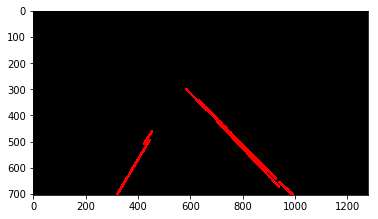

In [35]:
# I don't know how to find bgr color map in matplotlib cmap!
plt.imshow(line_image)

let's blend this image to our lane line image...

In [36]:
# lane image pixel intensity is reduced by a factor of 0.8 -> img * 0.8
# line image stays same. causing it to have 20% more weight
# lane_image will therefore be a lill bit darker. 
# helping us to better define the lines we're blending it into
# last arg is gamma, a value we can add to our sum.
#setting gamma to 1 won't make any difference.
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

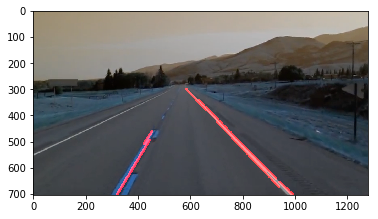

In [37]:
plt.imshow(combo_image)

# optimizing the Lane lines.

we will be averaging out the detected lines from the hough transform

In [38]:
def average_slope_intercept(img, lines):
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 =line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        print(parameters)

In [39]:
averaged_lines = average_slope_intercept(lane_image, detected_lines)

[   1. -286.]
[   1.03448276 -302.27586207]
[  -1.672 1238.04 ]
[   1.02564103 -299.        ]
[   1.05 -320.5 ]
[   1.05970149 -321.40298507]
[   1. -288.]
[   1.05797101 -321.43478261]
[   1.025 -293.175]
[  -1.5483871  1163.96774194]
[   0.96078431 -250.1372549 ]
[   1.05454545 -317.94545455]
[   1. -287.]


the polyfit returns a vecotr of coeficients which describes the the slope and y-intercepts.

in the result above we see the slope and y-intercept for every line detected in our lane image

lines on the left will have a negative slope, while lines on the right will have a postive slope. 

this is because lines on the left  in our image slant towards the right and as the value of x increases, the value of y decreases (becuase our y intercept starts with zero at the top and largest value beneath...).

for lines on te right, in our image they have a postive slope b/c as the value of x increases the value of y also increases.

this is pretty important cos if you have a different image the lane lines might behave differently.

In [40]:
def average_slope_intercept(img, lines):
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 =line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    print(left_fit)
    print(right_fit)

In [41]:
averaged_lines = average_slope_intercept(lane_image, detected_lines)

[(-1.6719999999999973, 1238.0399999999986), (-1.5483870967741804, 1163.9677419354778)]
[(1.0000000000000016, -286.0000000000012), (1.0344827586206884, -302.2758620689647), (1.025641025641023, -298.9999999999981), (1.0500000000000018, -320.50000000000114), (1.059701492537313, -321.40298507462654), (1.0000000000000007, -288.0000000000007), (1.0579710144927543, -321.43478260869625), (1.025000000000001, -293.1750000000008), (0.9607843137254856, -250.13725490195634), (1.0545454545454551, -317.9454545454552), (0.9999999999999986, -286.999999999999)]


Next, we want to average out all these values in aveare values so we have one slope and intercept value for each side respectively.

In [42]:
def average_slope_intercept(img, lines):
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 =line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    print(left_fit_average)
    print(right_fit_average)

In [43]:
averaged_lines = average_slope_intercept(lane_image, detected_lines)

[  -1.61019355 1201.00387097]
[   1.0243751  -298.80648538]


In [44]:
def make_coordinates(img, line_parameters):
    slope, intercept = line_parameters
    y1 = img.shape[0]
    # we want the height of the new line to be 3/5 of the y-axis
    y2 = int(y1 * (3/5))
    # re-arranging y= mx + b we can get the x-coordinate values
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    #the maths above allows both of our lines to have 
    #the same vertical coordinates
    return np.array([x1, y1, x2, y2])

In [45]:
def average_slope_intercept(img, lines):
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 =line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(img, left_fit_average)
    right_line = make_coordinates(img, right_fit_average)
    
    return np.array([left_line, right_line])

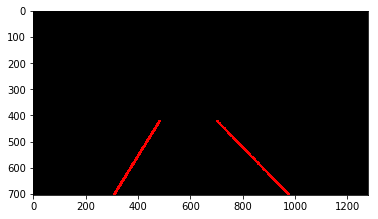

In [46]:
averaged_lines = average_slope_intercept(lane_image, detected_lines)
line_image = display_lines(lane_image, averaged_lines)
plt.imshow(line_image)

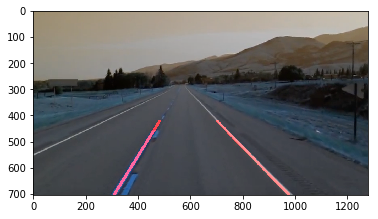

In [47]:
averaged_lines = average_slope_intercept(lane_image, detected_lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
plt.imshow(combo_image)